# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather/?q="
para = f"&appid={weather_api_key}"
unit = "&units=metric"


# Define an empty list to fetch the weather data for each city
city_data = []

    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}{para}{unit}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  pd.to_datetime(city_weather["dt"], unit='s')
#          

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | alihe
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | half moon bay
Processing Record 14 of Set 1 | asau
Processing Record 15 of Set 1 | blagoyevo
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | gilazi
City not found. Skipping...
Processing Record 22 

Processing Record 38 of Set 4 | shache
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | sainte-maxime
Processing Record 41 of Set 4 | weligama
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | tay ninh
Processing Record 44 of Set 4 | priyutnoye
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | camalu
Processing Record 48 of Set 4 | bonfim
Processing Record 49 of Set 4 | vostok
Processing Record 0 of Set 5 | gulshat
City not found. Skipping...
Processing Record 1 of Set 5 | lagunas
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | baghmara
Processing Record 5 of Set 5 | shangzhi
Processing Record 6 of Set 5 | volchikha
Processing Record 7 of Set 5 | araguacu
Processing Record 8 of Set 5 | buala
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | bridlington
Processing Record 11 of Set 5 | ampanih

Processing Record 26 of Set 8 | avera
Processing Record 27 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 28 of Set 8 | helena
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | egvekinot
Processing Record 31 of Set 8 | warman
Processing Record 32 of Set 8 | sabancuy
Processing Record 33 of Set 8 | trairi
Processing Record 34 of Set 8 | petukhovo
Processing Record 35 of Set 8 | tual
Processing Record 36 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | les escoumins
Processing Record 41 of Set 8 | hulan ergi
Processing Record 42 of Set 8 | chernyshevskiy
Processing Record 43 of Set 8 | abeche
Processing Record 44 of Set 8 | buenaventura
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | senneterre
Processing Record 47 of Set 8 | barawe
City not found. Skipping...
Processing 

Processing Record 11 of Set 12 | marsabit
Processing Record 12 of Set 12 | brezice
Processing Record 13 of Set 12 | aksay
Processing Record 14 of Set 12 | kemin
Processing Record 15 of Set 12 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 16 of Set 12 | asfi
Processing Record 17 of Set 12 | lahaina
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | la ronge
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | rokytne
Processing Record 23 of Set 12 | leh
Processing Record 24 of Set 12 | shkotovo-26
City not found. Skipping...
Processing Record 25 of Set 12 | saint-leu
Processing Record 26 of Set 12 | samana
Processing Record 27 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | oistins
Processing Record 30 of Set 12 | anori
Processing Record 31 of Set 12 | turayf
Processing Record 32 of Set 12 | chumikan
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data
# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,25.47,80,20,3.60,US,2023-03-30 18:29:33
1,saint george,37.1041,-113.5841,10.53,51,20,5.66,US,2023-03-30 18:29:34
2,saint-philippe,-21.3585,55.7679,26.77,89,93,4.48,RE,2023-03-30 18:29:34
3,alihe,50.5667,123.7167,1.27,82,1,0.91,CN,2023-03-30 18:29:34
4,hami,42.8000,93.4500,13.63,14,0,4.75,CN,2023-03-30 18:29:35


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,25.47,80,20,3.60,US,2023-03-30 18:29:33
1,saint george,37.1041,-113.5841,10.53,51,20,5.66,US,2023-03-30 18:29:34
2,saint-philippe,-21.3585,55.7679,26.77,89,93,4.48,RE,2023-03-30 18:29:34
3,alihe,50.5667,123.7167,1.27,82,1,0.91,CN,2023-03-30 18:29:34
4,hami,42.8000,93.4500,13.63,14,0,4.75,CN,2023-03-30 18:29:35


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

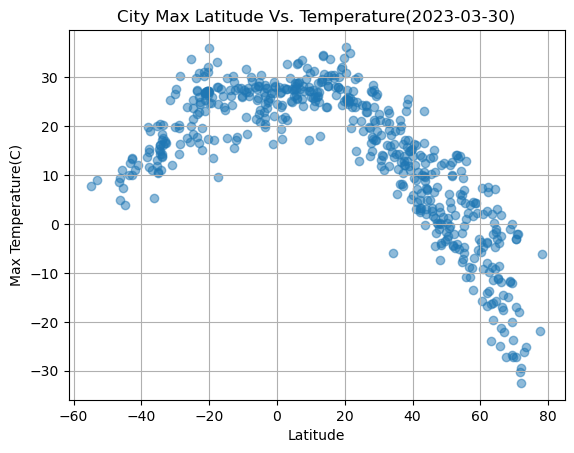

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=0.5)
           

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid() 



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

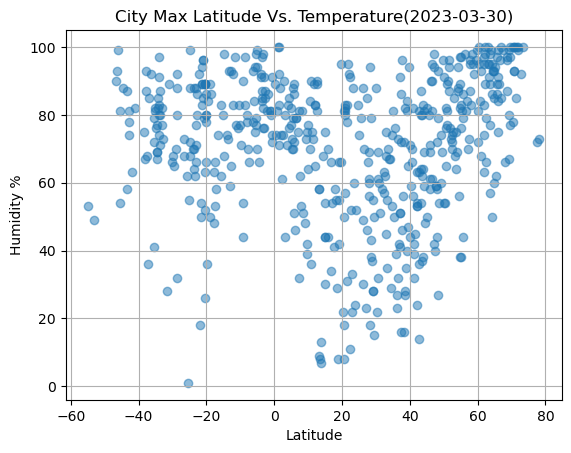

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

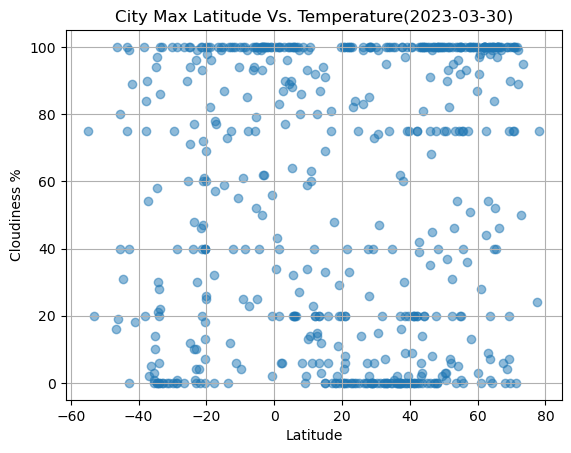

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

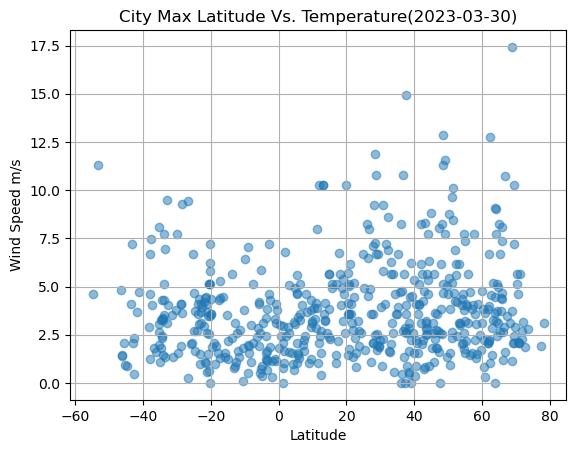

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=0.5)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(2023-03-30)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.grid() 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def ling(xaxis,yaxis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis,yaxis)
    regress = slope*xaxis + intercept
    fig1, ax1 = plt.subplots()
    plt.scatter(xaxis,yaxis)
    plt.xlabel("Latitude")
    plt.plot(xaxis,regress,c="r")
    Rsqr = rvalue**2 
    print(f"r^2-value is {Rsqr}")
    
    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[(city_data_df["Lat"] > 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,25.47,80,20,3.60,US,2023-03-30 18:29:33
1,saint george,37.1041,-113.5841,10.53,51,20,5.66,US,2023-03-30 18:29:34
3,alihe,50.5667,123.7167,1.27,82,1,0.91,CN,2023-03-30 18:29:34
4,hami,42.8000,93.4500,13.63,14,0,4.75,CN,2023-03-30 18:29:35
8,hilo,19.7297,-155.0900,25.16,95,100,2.57,US,2023-03-30 18:29:36


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint-philippe,-21.3585,55.7679,26.77,89,93,4.48,RE,2023-03-30 18:29:34
5,punta arenas,-53.1500,-70.9167,9.06,49,20,11.32,CL,2023-03-30 18:29:35
6,mataura,-46.1927,168.8643,4.92,99,19,1.46,NZ,2023-03-30 18:29:35
7,port elizabeth,-33.9180,25.5701,17.16,83,0,5.14,ZA,2023-03-30 18:29:36
9,alice springs,-23.7000,133.8833,17.75,88,77,4.12,AU,2023-03-30 18:25:08


###  Temperature vs. Latitude Linear Regression Plot

r^2-value is 0.7907872810931528


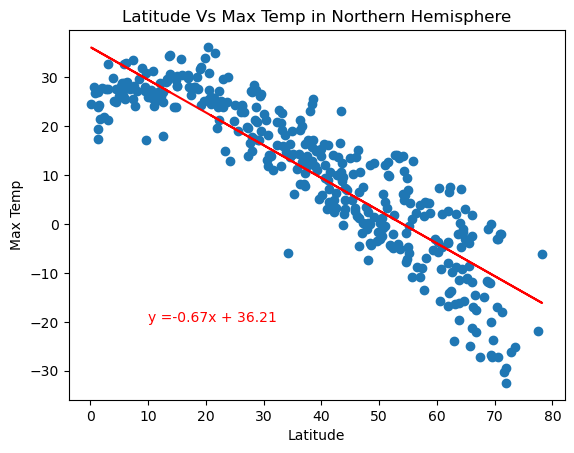

In [48]:
# Linear regression on Northern Hemisphere
ling(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.ylabel("Max Temp")
plt.title("Latitude Vs Max Temp in Northern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(10,-20),color = "red")
plt.show()





r^2-value is 0.47337956809004433


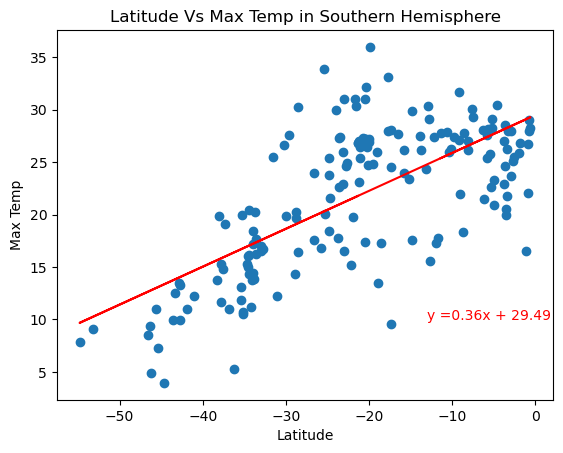

In [47]:
# Linear regression on Southern Hemisphere
ling(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.ylabel("Max Temp")
plt.title("Latitude Vs Max Temp in Southern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(-13,10),color = "red")
# print(slope)
# print(intercept)
plt.show()


**Discussion about the linear relationship:** Strong cooelation in Northern hemisphere and Weak correlation in Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r^2-value is 0.11482444455117424


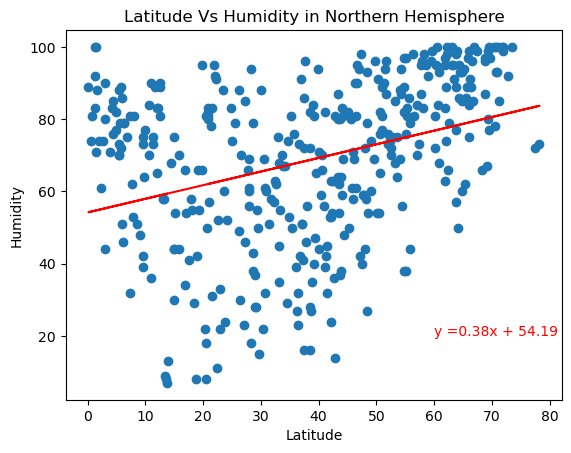

In [46]:
# Northern Hemisphere
ling(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity in Northern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(60,20),color = "red")
plt.show()

r^2-value is 0.02948829491365378


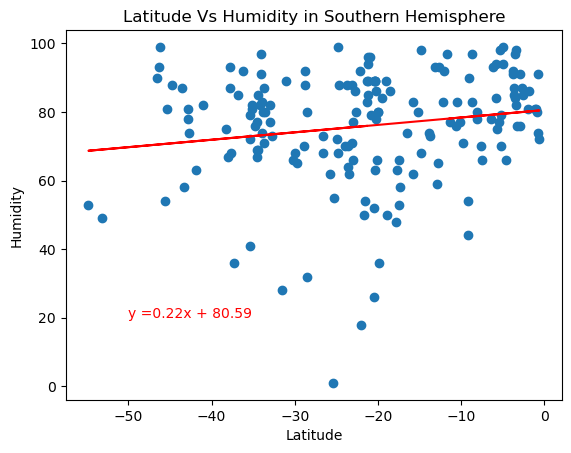

In [45]:
# Southern Hemisphere
ling(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity in Southern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(-50,20),color = "red")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and humidity for both northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

r^2-value is 0.031539968849021646


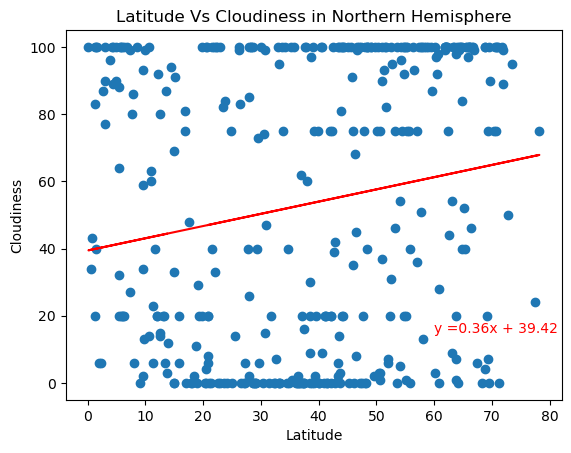

In [44]:
# Northern Hemisphere
ling(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness in Northern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(60,15),color = "red")
plt.show()

r^2-value is 0.11318886183415576


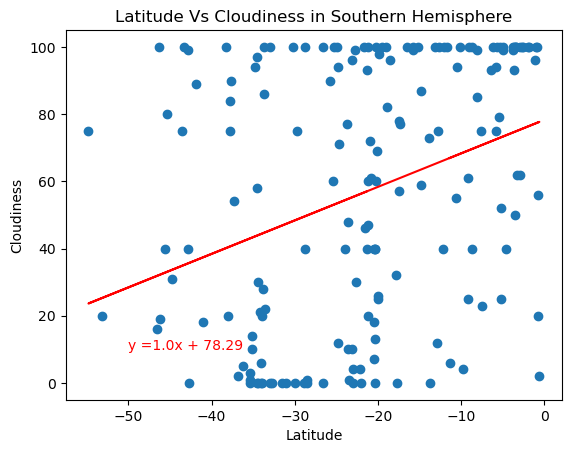

In [43]:
# Southern Hemisphere
ling(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness in Southern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(-50,10),color = "red")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and cloudiness for both northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r^2-value is 0.010641000660218492


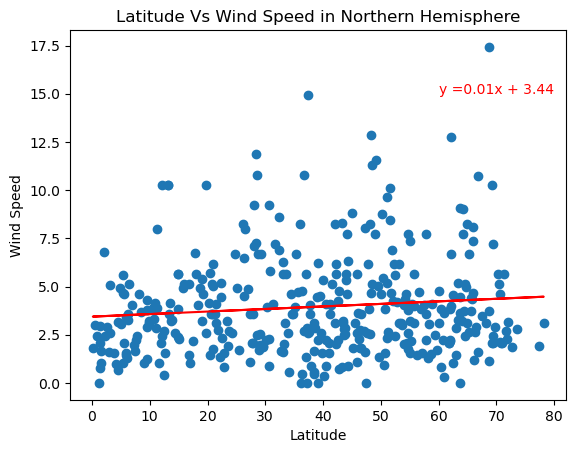

In [42]:
# Northern Hemisphere
ling(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed in Northern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(60,15),color = "red")
plt.show()

r^2-value is 0.05496945239504104


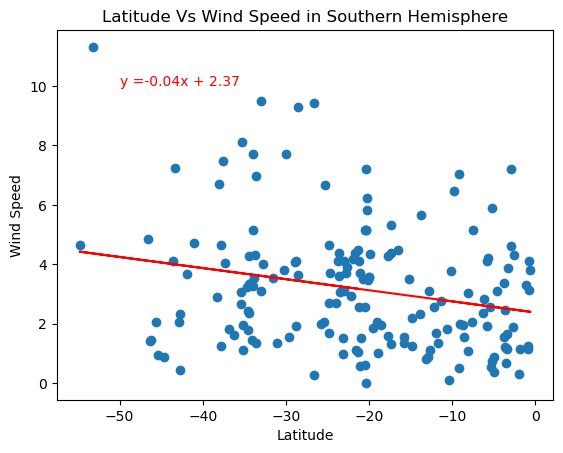

In [41]:
# Southern Hemisphere
ling(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed in Southern Hemisphere")
plt.annotate(f"y ={round(slope,2)}x + {round(intercept,2)}",(-50,10),color = "red")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and wind speed for both northern and southern hemisphere as R square value is close to 0.